In [1]:
%matplotlib notebook
from IPython.display import Image

In [2]:
import h5py
import torch
import numpy as np

from sklearn import decomposition

from matplotlib import pyplot as plt
import matplotlib.animation as animation

In [9]:
MODEL_PATH = '../scripts/results'

In [10]:
f = h5py.File(MODEL_PATH + '/encoding.h5','r')
latent = np.array(f['latent'])
orign  = np.array(f['input'])
recon  = np.array(f['recon'])
f.close()

# deals with VAE case where I also saved logvar, use only mu here
if latent.shape[0] == 2:
    latent = latent[0]

model = torch.load(MODEL_PATH + '/model.pt')

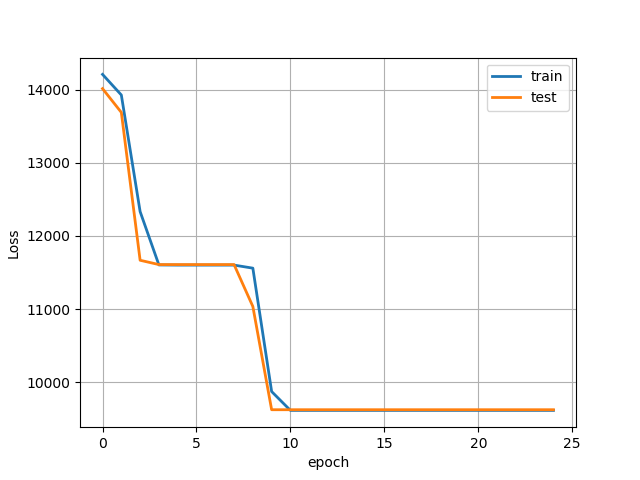

In [11]:
Image(filename=MODEL_PATH + '/loss_curves.png')

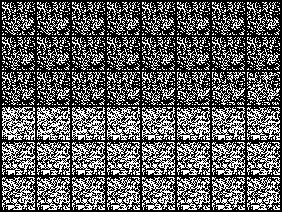

In [12]:
Image(filename=MODEL_PATH + '/z0.png')

## Analysis of Latent Space

<IPython.core.display.Javascript object>


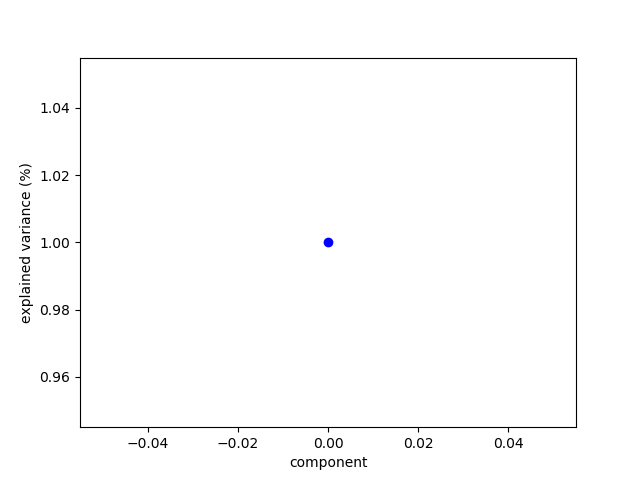

In [7]:
n_components = latent.shape[1]

pca = decomposition.PCA(n_components=n_components)
pca.fit(latent)

plt.figure()
plt.plot(pca.explained_variance_ratio_, 'bo')
plt.plot(pca.explained_variance_ratio_, 'b-')
plt.xlabel('component')
plt.ylabel('explained variance (%)')
plt.show()

<IPython.core.display.Javascript object>


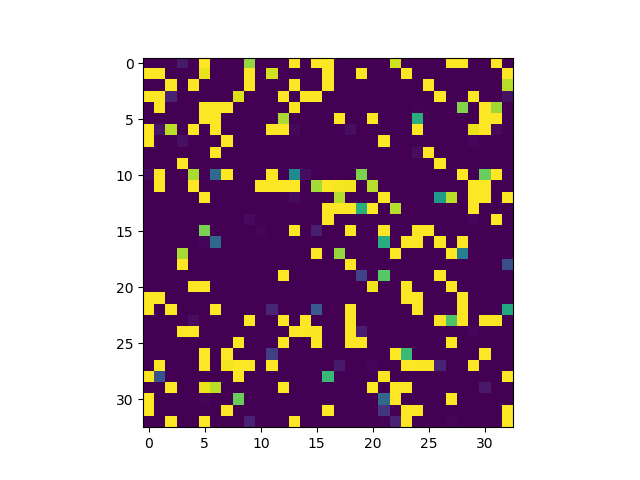

In [8]:
# trace out the PC space

samples = 100
lim = 8 # 2
res = 0.1 # 0.05
fps = 60

basis = 'pcs'
#basis = 'latent'

for c in range(n_components):
    
    fig = plt.figure()
    ims = []
            
    for limits in [(l,l+res) for l in np.arange(-lim,lim,res)]:

        s = np.linspace(limits[0], limits[-1], num=samples)
        if basis == 'pcs':
            z = pca.components_[c]
        elif basis == 'latent':
            z = np.eye(n_components)[c]

        x = torch.tensor(np.outer(s, z).astype(np.float32))
        res = model.decode(x).detach().numpy().reshape(-1, 33, 33)

        ims.append( [plt.imshow(res.mean(0), animated=True)] )
        
    ani = animation.ArtistAnimation(fig, ims, interval=fps, blit=True,
                                    repeat_delay=0)
    #ani.save(MODEL_PATH + '/%s_%d_movie.mp4' % (basis, c), 
    #         fps=fps, extra_args=['-vcodec', 'libx264'])
    plt.show()

<IPython.core.display.Javascript object>


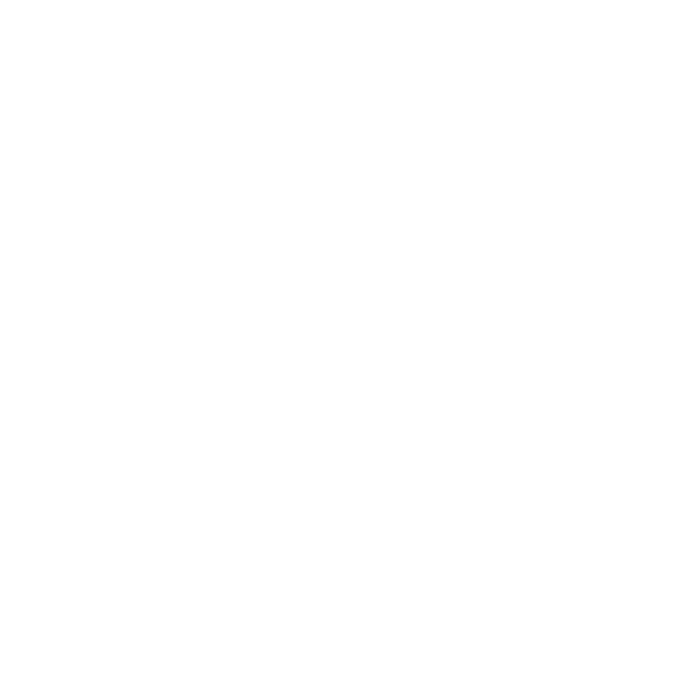

In [9]:
pc_space = pca.transform(latent)

plt.figure(figsize=(7,7))

for i in range(n_components):
    for j in range(i+1, n_components):

        sp = i*n_components + j + 1
        plt.subplot(n_components, n_components, sp)
        plt.hist2d(pc_space[:,i], pc_space[:,j], bins=15)
        plt.xlabel('pc %d' % i)
        plt.ylabel('pc %d' % j)
        
plt.show()